<h1 style='font-size:40px'> Integrals</h1>

<div> 
    <ul style='font-size:20px'> 
        <li> 
            Extraímos integrais de uma função quando desejamos saber a área sob a sua curva dentro de um intervalo. A intuição seria traçarmos vários retângulos na região e somarmos as suas áreas.
        </li>
    </ul>
</div>

<BarContainer object of 10 artists>

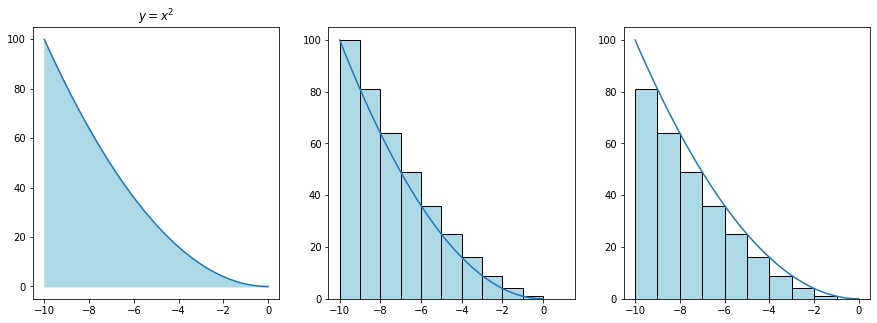

In [71]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-10, 0, 101)
y = x**2

# Área x^2.
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.plot(x,y)
plt.title('$y=x^{2}$')
plt.fill_between(x,y, color='lightblue')

# Ŕetângulos sob a curva.
x_bar = np.linspace(-10, 0, 11)
y_bar = x_bar**2
plt.subplot(132)
plt.plot(x,y)
plt.bar(x_bar,y_bar, width=1, color='lightblue', edgecolor='k', align='edge')

# Segundo tipo de aproximação (curva tangenciando vértice superior direito).
x_bar2 = np.linspace(-9, 0, 10)
y_bar2 = x_bar2**2
plt.subplot(133)
plt.plot(x,y)
plt.bar(x_bar2,y_bar2, width=-1, color='lightblue', edgecolor='k', align='edge')

<div> 
    <ul style='font-size:20px'> 
        <li> 
            Note que os retângulos podem ter a sua altura definida a partir do valor da abscissa esquerda ou direita. Com isso, obtemos duas aproximações ($L_{n}; R_{n}$) em que n é a quantidade de retângulos.
        </li>
        <li> 
            Conforme aumentamos o número de barras, $L_{n}$ e $R_{n}$ se aproximam a um valor comum, que seria a área verdadeira da seção.
            $$
                L_{n}<A<R_{n}
            $$
        </li>
    </ul>
</div>

In [78]:
# Medindo a área aproximada sob a curva em [-10, 0].

# Podemos concluir que R_10>A>L_10.
np.dot(np.diff(x_bar), y_bar[:-1]), np.dot(np.diff(x_bar2), y_bar2[:-1])

(385.0, 285.0)

<div> 
    <ul style='font-size:20px'> 
        <li> 
            Ao dividirmos a área sob a curva em n retângulos dentro do intervalo [a,b], a largura de cada um deles será tida como $\Delta{x}=\frac{b-a}{n}$.
        </li>
        <li> 
            A fórmula da aproximação pelo vértice esquerdo pode ser dada como $L=\lim_{n \to \infty}{\sum_{i=1}^{n}f(x_{i-1})\Delta{x}}$
        </li>
        <li> 
            Já a do pelo direito: $R=\lim_{n \to \infty}{\sum_{i=1}^{n}f(x_{i})\Delta{x}}$
        </li>
    </ul>
</div>

<h2 style='font-size:30px'> Sample Points</h2>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            É ainda possível utilizar um ponto intermediário entre $x_{i-1}$ e $x_{i}$ como abscissa a definir a altura da barra. O livro o chama de sample point, sendo esse denotado como $x_{i}^{*}$. 
            $$
                S=\lim_{n \to \infty}\sum_{i=1}^{n}f(x_{i}^{*})\Delta{x}
            $$
        </li>
    </ul>
</div>

<h4 style='font-size:30px;font-style:italic;text-decoration:underline'> Example III</h4>

In [110]:
print(f'b (4 Intervalos): {sum([.5*np.exp( -(1/4 + (i-1)/2) ) for i in range(1,5)])}')
print(f'b (10 Intervalos): {sum([.2*np.exp( -(1/10 + (i-1)/5) ) for i in range(1,11)])}')

b (4 Intervalos): 0.8557230380615274
b (10 Intervalos): 0.8632252884236424


<h2 style='font-size:30px'> The Distance Problem</h2>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            O cálculo da distância percorrida por um objeto dada a sua velocidade é um problema clássico de medidas de áreas sub curvas.
        </li>
        <li> 
            Para esse fim, designamos a cada intervalo de tempo uma velocidade que será usada como altura do retângulo. O ideial seria fazermos inúmeras medições da velocidade durante o tempo para nos permitir gerar um número maior de barras.
        </li>
    </ul>
</div>

Text(0.5, 1.0, 'Velocidade x Tempo')

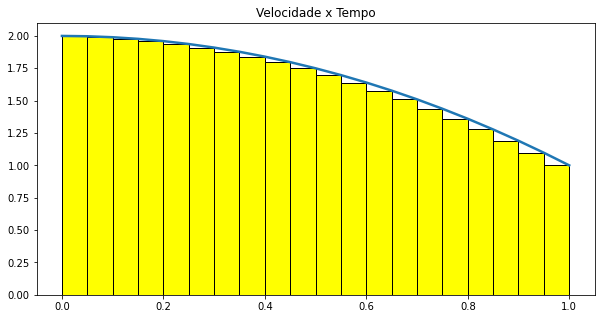

In [262]:
# Uma pequena função velocidade em função do tempo v(t)=-t**2 + 2
t = np.linspace(0, 1, 21) 
v = -t** 2 + 2

# Expressando a função como gráfico de linha e barras.
plt.figure(figsize=(10,5))
plt.plot(t, v, lw=2.5)
plt.bar(t[1:], v[1:], width=-.05,align='edge', color='yellow',edgecolor='k')
plt.title('Velocidade x Tempo')

<h3 style='font-size:30px;font-style:italic'> 5.1 Exercises</h3>

<h4 style='font-size:30px;font-style:italic;text-decoration:underline'> 5</h4>

In [400]:
def ex5(x:float):
    return 1 + x**2

def integral(func:'function', interval:list, n:int, height_type:str):
    assert height_type in ('left', 'right', 'midpoint'), '`height_type` deve ser \'left\', \'right\' ou \'midpoint\''
    # Delta x da função
    delta = abs(interval[1] - interval[0]) / n
    # Lógica caso usarmos o left-endpoint.
    if height_type == 'left':
        # Abscissas onde medir a função (altura das barras).
        x = np.linspace(interval[0], interval[1], n+1)[:-1]
        # Altura das barras.
        height = np.array([func(i) for i in x])
        return sum(delta *  height)
    
    # Lógica caso usarmos o right-endpoint.
    elif height_type == 'right':
        # Abscissas onde medir a função (altura das barras).
        x = np.linspace(interval[0]+delta, interval[1]+delta, n+1)[:-1]
        # Altura das barras.s
        height = np.array([func(i) for i in x])
        return sum(delta * height)
    
    # Lógica usando midpoints.
    else:
        x = np.linspace(interval[0], interval[1], n+1)
        x = [np.mean([x[i-1], x[i]]) for i in range(1, len(x))]
        height = np.array([func(i) for i in x])
        return sum(delta * height)
        
integral(ex5, [-1, 2], 6, 'midpoint')

5.9375

<h4 style='font-size:30px;font-style:italic;text-decoration:underline'> 11</h4>

In [302]:
t = np.linspace(0, 3, 7)
v = [0, 6.2, 10.8, 14.9, 18.1, 19.4, 20.2]

# Medindo AUC pelo vértice esquerdo dos retângulos.
L = np.dot(np.diff(t), v[:-1])
print(f'L: {L :.2f}')

# Agora, pelo direito.
R = np.dot(np.diff(t), v[1:])

print(f'R: {R :.2f}')

L: 34.70
R: 44.80


<h2 style='font-size:30px'> 5.2 The Definite Integral</h2>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            A operação feita na última seção, em que estimamos a área sob uma curva com o uso de infinitos retângulos de bases iguais, é conhecida como integralização. Portanto, ao medirmos tal valor, extraímos a integral da função.
        </li>
        <li> 
            A notação de uma integral de f(x) no intervalo [a,b] é:
            $$
                \int_{a}^{b}f(x)dx=\lim_{n \to \infty}\sum_{i=1}^{n}f(x_{i}^{*})\Delta{x}
            $$
        </li>
    </ul>
</div>

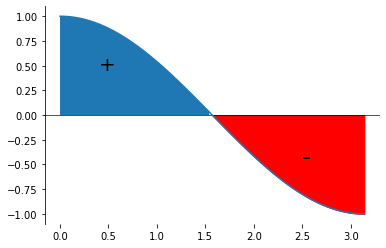

In [344]:
# Mas observe: seções do gráfico em ordenadas negativas subtraem as áreas das regiões positivas da figura. 
x = np.linspace(0, np.pi, 101)
y = np.cos(x)

# Eixo x.
plt.axhline(0, lw=2/3, c='k')

# Gráfico da função cosseno [0, pi].
plot = plt.plot(x,y)

# Área posivita da função.
plt.fill_between(x, y, where=x<np.pi/2)
plt.text(.4, .45, '+', fontdict={'size':20})

# Área negativa.
plt.fill_between(x, y, where=x>np.pi/2, color='r')
plt.text(2.5 , -.5, '-', fontdict={'size':25})

for side in ['top', 'right', 'bottom']:
    plt.gca().spines[side].set_visible(False)

<div> 
    <ul style='font-size:20px'> 
        <li> 
            É importante salientar que as bases dos triângulos ($\Delta{x_{i}^{*}}$) não precisam ser do mesmo tamanho! Existem situações em que não usufruiremos de intervalos equidistantes.
        </li>
        <li> 
            Um exemplo acessível a nós é o objeto `roc_curve`, do `sklearn.metrics`. Esse não retorna intervalos de FPR igualmente espaçados para medirmos a AUC. 
        </li>
    </ul>
</div>

In [358]:
# Criando uma Regressão Logística.
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

# Segregação dados.
X,y = load_breast_cancer(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

# Padronização.
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

# Treinamento.
lr = LogisticRegression().fit(X_train_scaled, y_train)

In [375]:
fpr,tpr,_ = roc_curve(lr.predict(X_test_scaled), y_test)

# Veja: há uma grande diferença entre as marcações de FPR retornadas.
np.diff(fpr)

array([0.03636364, 0.96363636])

<div> 
    <ul style='font-size:20px'> 
        <li> 
            Nessa situação, teremos que assegurar que todos os intervalos tendam a 0.
            $$
                \int_{a}^{b}f(x)dx=\lim_{\max{\Delta{x_{i}} \to 0}}\sum_{i=1}^{n}\Delta{x_{i}}f(x_{i}^{*})
            $$
        </li>
    </ul>
</div>

<h3 style='font-size:30px;font-style:italic'> Teorema</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Um função é integrável em um intervalo [a,b], essa deve ser contínua e apresentar uma quantidade finita de "jump discontinuities" em [a,b].
        </li>
    </ul>
</div>

<h3 style='font-size:30px;font-style:italic'> Evaluating Integrals</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Seguem aqui fórmulas voltadas à soma de elementos de ordenações numéricas.
            <center>
                <img src='sum_powers.jpeg'>
                <img src='sigma_prop.jpg'>
            </center>
        </li>
    </ul>
</div>

<h4 style='font-size:30px;font-style:italic;text-decoration:underline'> Example II</h4>

In [394]:
# a.
def exampleII(x):
    return x**3 - 6*x
print('a: {:.5f}'.format(integral(exampleII, [0,3], 6, 'right')))

# b.
print('b: {:.5f}'.format(integral(exampleII, [0,3], 10000, 'right')))

a: -3.93750
b: -6.74865


<h3 style='font-size:30px;font-style:italic'> Midpoint Rule</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            O livro afirma que, muitas vezes, é melhor usarmos o ponto intermediário dos subintervalos como altura dos retângulos. Esse, por sua vez, é denotado como $\overline{x}_{i}$. Com isso, soma de Riemann ficaria como:
            $$
                \lim_{n \to \infty} \sum_{i=1}^{n} f(\overline{x}_{i})\Delta{x}
            $$
        </li>
        <li style='margin-top:10px'> 
            $\overline{x}_{i}$ ficaria como $\frac{x_{i-1}+x_{i}}{2}$
        </li>
    </ul>
</div>

<h4 style='font-size:30px;font-style:italic;text-decoration:underline'> Example V</h4>

In [395]:
def exampleV(x):
    return 1/x

integral(exampleV, [1,2], 5, 'midpoint')

0.6919078857159353

<h3 style='font-size:30px;font-style:italic'> Properties of the Definite Integral</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Seguem abaixo propriedades úteis no cálculo de integrais. Elas são validas se $a\lt b$, $a=b$, ou $a\gt b$:
            <ul style='list-style-type:decimal;margin-top:10px'> 
                <li style='margin-top:10px'> 
                    $\int_{a}^{b}c\times{dx}=c(b-a)$
                </li>
                <li style='margin-top:20px'> 
                    $\int_{a}^{b}[f(x)+g(x)]dx=\int_{a}^{b}f(x)dx+\int_{a}^{b}g(x)dx$
                </li>
                <li style='margin-top:20px'> 
                    $\int_{a}^{b}cf(x)dx=c\int_{a}^{b}f(x)dx$
                </li>
                <li style='margin-top:20px'> 
                    $\int_{a}^{b}[f(x)-g(x)]dx=\int_{a}^{b}f(x)dx-\int_{a}^{b}g(x)dx$
                </li>
                <li style='margin-top:20px'> 
                    $\int_{a}^{c}f(x)dx+\int_{c}^{b}f(x)dx=\int_{a}^{b}f(x)dx$
                </li>
            </ul>
        </li>
    </ul>
</div>

<div> 
    <ul style='font-size:20px'> 
        <li> 
            Demonstração visual da propriedade 5: Meça $\int_{0}^{\frac{\pi}{2}}\cos(x)dx+\int_{\frac{\pi}{2}}^{\pi}\cos(x)dx$.
        </li>
        <li> 
            Note que era possível medir uma única integral $\int_{0}^{\pi}\cos(x)dx$.
        </li>
    </ul>
</div>

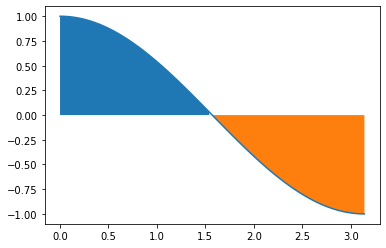

In [411]:
x = np.linspace(0, np.pi, 101)
y = np.cos(x)

plt.plot(x, y)
plt.fill_between(x, y, where=x<=np.pi/2) # Área da primeira integral
plt.fill_between(x, y, where=x>=np.pi/2) # Área da segunda integral

<h3 style='font-size:30px;font-style:italic'> Comparison Properties of the Integral</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            As demais propriedades abaixo são apenas satisfeitas quando $a \geq b$:
            <ol start='6'> 
                <li style='margin-top:10px'> 
                    Se $f(x)\geq 0$ em [a,b], então $\int_{a}^{b}f(x)dx\geq 0$
                </li>
                <li style='margin-top:20px'> 
                    Se $f(x) \geq g(x)$ em [a,b], então $\int_{a}^{b}f(x)dx \geq \int_{a}^{b}g(x)dx$.
                </li>
                <li style='margin-top:20px'> 
                    Se $m\leq f(x) \leq M$ em [a,b], então $\int_{a}^{b}mdx \leq \int_{a}^{b}f(x)dx \leq \int_{a}^{b}Mdx$. 
                    <p> A meu entender, m e M podem ser tanto constantes, quanto funções.</p>
                </li>
            </ol>
        </li>
    </ul>
</div>

<h2 style='font-size:30px'> 5.3 The Fundamental Theorem of Calculus</h2>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            O Teorema Fundamental do Cálculo expõe a relação inversa entre a diferenciação e integralização. A sua primeira parte lida com equações da seguinte forma:
            <center style='margin-top:20px'> 
                $g(x)=\int_{a}^{x}f(t)dt$
            </center>
        </li>
        <li style='margin-top:20px'> 
            Observe que a função g(x) corresponde ao valor da integral de f(t) no intervalo [a,x]. Como x é uma variável, a área sob a curva não tem valor fixo.
        </li>
    </ul>
</div>

<h3 style='font-size:30px;font-style:italic'> g'(x)=f(x)</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Uma propriedade importante da primeira parte do Teorema é que $g(x)$ é uma antiderivada de $f(x)$. Para isso, faremos uma breve demonstração.
        </li>
        <li> 
            Com $g(x)=\int_{0}^{x}f(t)dt$ | $g(x+h)=\int_{0}^{x+h}f(t)dt$ | $h \to 0$:
            <center style='margin-top:20px'> 
                $g(x+h)-g(x)=\int_{x}^{x+h}f(t)dt$
            </center>
        </li>
        <li style='margin-top:20px'> 
            Como h é um valor muito pequeno, podemos usar o comprimento de $[x, x+h]$ para medir a AUC. Portanto, estaremos usando um único retângulo na operação.
            <center style='margin-top:20px'> 
                $\therefore g(x+h)-g(x)=\int_{x}^{x+h}f(t)dt=f(x)[(x+h)-x]=f(x)h$
            </center>
        </li>
        <li style='margin-top:20px'> 
            Conseguimos dividir ambas as extremidades da última equação por $h$. Ficaremos, assim, com:
            <center style='margin-top:20px'>
                $\frac{g(x+h)-g(x)}{h}=f(x)$
            </center>
        </li>
        <li style='margin-top:20px'> 
            Como $h \to 0$, acabamos de medir a derivada de $g(x)$ em qualquer ponto $x$, reconhecendo que essa é igual a $f(x)$. 
            <center style='margin-top:20px'>
                $g'(x)=\frac{g(x+h)-g(x)}{h}=f(x)$
            </center>
        </li>
    </ul>
</div>

(0.0, 1.2)

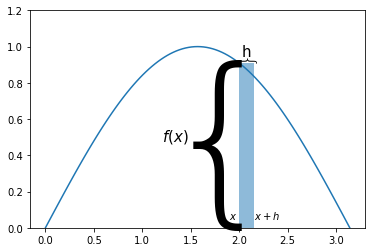

In [524]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, np.pi, 101)
y = np.sin(x)

plt.plot(x,y)
plt.bar(2, np.sin(2), align='edge', alpha=.5, width=.15, )

plt.text(1.2, 0.15, '{', fontdict={'size':'185', 'weight':'100'})
plt.text(1.2, .48, '$f(x)$', fontdict={'size':'15'})
plt.text(2.025, .95, 'h', fontdict={'size':'15'})
plt.text(1.95, .9, '{', fontdict={'size':'20', 'weight':'200'}, rotation=270)
plt.text(1.9, .05, '$x$')
plt.text(2.15, .05, '$x+h$')

plt.ylim([0, 1.2])

<h3 style='font-size:30px;font-style:italic'> FTC1</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Considerando o que foi visto, Primeira Pate do Teorema Fundamental do Cálculo (FTC1) pode ser entendida da seguinte maneira:
            <div style='border-style:solid;padding:10px'> 
                Se f é contínua em [a,b], a função $g(x)=\int_{a}^{x}f(t)dt$, em que $a\leq x \leq b$:
                <ul> 
                    <li>É contínua em [a,b]</li> 
                    <li>É diferenciável em (a,b)</li>
                    <li>Tem a sua derivada $g'(x)=f(x)$.</li>
                </ul>
            </div>
        </li>
        <li style='margin-top:20px'>
            Na notação de Leibniz, podemos afirmar que $\frac{d}{dx}\int_{a}^{x}f(t)dt=f(x)$;
        </li>
    </ul>
</div>

<h3 style='font-size:30px;font-style:italic'> FTC2</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            A Segunda Parte do Teorema Fundamental lida com a medida de integrais em si. Essa diz que:
            <div style='border-style:solid;padding:10px'> 
                $g(x)=\int_{a}^{x}f(t)dt=F(x)-F(a)$, em que F é qualquer antiderivada de f.
            </div>
        </li>
    </ul>
</div>

<h4 style='font-size:30px;font-style:italic;text-decoration:underline'> Prova do FTC2</h4>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Pelo Corollary 4.2.7, entende-se que $F(x)=g(x)+C$, uma vez que ambas as funções são antiderivadas de $f(x)$.
            <center style='margin-top:20px'> 
                $F(x)-F(a)=[g(x)+C]-[g(a)+C]$
            </center>
            <center style='margin-top:20px'> 
                $F(x)-F(a)=g(x)-g(a)=g(x)$ 
            </center>
            <center style='margin-top:20px'> 
                $\therefore F(x)-F(a)=\int_{a}^{x}f(t)dt$ 
            </center>
        </li>
        <li style='margin-top:20px'>
            Lembrando que $g(a)=\int_{a}^{a}f(t)dt=0$
        </li>
    </ul>
</div>

<h4 style='font-size:30px;font-style:italic;text-decoration:underline'> Notações</h4>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Podemos abreviar a subtração da antiderivada como $F(x)]_{a}^{b}$, $F(x)|_{a}^{b}$ ou $[F(x)]_{a}^{b}$
        </li>
        <li> 
            $\int_{a}^{b}\frac{dx}{x}$ é uma abreviação de $\int_{a}^{b}\frac{1}{x}dx$.
        </li>
    </ul>
</div>

<h4 style='font-size:30px;font-style:italic;text-decoration:underline'> Example IX</h4>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Qual o problema de $\int_{-1}^{3}\frac{1}{x^{2}}dx$?
            <ul style='list-style-type:square'> 
                <li> 
                    O FTC é válido apenas para funções que são contínuas no intervalo dado. $\frac{1}{x^{2}}$ tem uma descontinuidade em x=0.
                </li>
            </ul>
        </li>
    </ul>
</div>

<h2 style='font-size:30px'> 5.4 Indefinite Integrals and The Net Change Problem</h2>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Quando trabalhamos com Antiderivadas, não chegamos a usar uma notação para representá-las. Por isso, aprenderemos aqui que, para informar que uma função é antiderivada de outra, escrevemos:
            <center style='margin-top:20px'> 
                $\int{f(x)dx}=F(x)$
            </center>
        </li>
        <li style='margin-top:20px'> 
            Podemos chamar uma antiderivada de integral indefinida de $f(x)$. Isso não é válido para todas as antiderivadas, já que $\int_{a}^{b}f(x)dx$, mesmo tendo essa relação com $f(x)$, é a sua integral definida - AUC.
        </li>
    </ul>
</div>

<h3 style='font-size:30px;font-style:italic'> Applications</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Como usamos antiderivadas na mensuração de integrais, podemos escrever o FTC2 da seguinte maneira:
            <center> 
                $\int_{a}^{b}F'(x)dx=F(x)]_{a}^{b}$
            </center>
        </li>
        <li style='margin-top:20px'> 
            Fomos apresentados aqui a casos reais de aplicação do FTC2. É importante, por exemplo, lembrarmos a diferença entre deslocamento e distância percorrida:
            <center style='margin-top:20px'> 
                Deslocamento: $\int_{a}^{b}v(t)dt$
            </center> 
            <center style='margin-top:20px'> 
                Distância Percorrida: $\int_{a}^{b}|v(t)|dt$
            </center> 
        </li>
        <li style='margin-top:20px'> 
            A unidade de medida da integral de uma função é o produto da unidade de medida de $f(x)$ pela de $\Delta{x}$. Por exemplo, a AUC da função velocidade será $\frac{m}{s}\times s=m$.
        </li>
    </ul>
</div>

<h2 style='font-size:30px'> 5.5 The Substitution Rule</h2>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Quando lidamos com integrais de funções compostas, podemos associar uma das equações a uma variável (tipicamente denotada como "u").
            <center> 
                <img src='substitution.jpeg'> 
            </center>
        </li>
        <li style='margin-top:20px'> 
            Essa regra costuma funcionar para funções da forma $F'(g(x))g'(x)$. O que acabamos por fazer é anular a composição ao associar $g(x)$ à variável "u".
            <center>$\int{F'(g(x))g'(x)dx}=F(g(x))+C=F(u)+C=\int{F'(u)du}$</center>
        </li>
    </ul>
</div>

<h3 style='font-size:30px;font-style:italic'> Definite Integrals</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Há uma versão da Regra da Substituição para Integrais Definidas.
            <div style='border-style:solid;padding:10px'> 
                Se $g'(x)$ é contínua em $[a,b]$ e $f(x)$ no alcance de $u=g(x)$:
                 <ul> 
                    <li style='margin-top:10px'>$\int_{a}^{b}f(g(x))g'(x)dx=\int_{g(a)}^{g(b)}f(u)du$.</li>
                </ul>
            </div>
        </li>
        <li style='margin-top:20px'> 
            Prova: Medindo a integral da derivada da composta, temos que:
            <center style='margin-top:20px'>
                $\int_{a}^{b}f(g(x))g'(x)dx=F(g(x))]_{a}^{b}=F(g(b))-F(g(a))$
            </center>
        </li>
        <li style='margin-top:20px'> 
            Agora, vamos definir $g(x)=u$ e trocar os limites por $[g(a), g(b)]$:
            <center style='margin-top:20px'>
                $\int_{g(a)}^{g(b)}f(u)du=F(u)]_{g(a)}^{g(b)}=F(g(b))-F(g(a))$
            </center>
        </li>
        <li style='margin-top:20px'> 
            Com isso, fica comprovado que:
            <center style='margin-top:20px'>
                $ \int_{a}^{b}f(g(x))g'(x)dx=\int_{g(a)}^{g(b)}f(u)du$
            </center>
        </li>
    </ul>
</div>

<h3 style='font-size:30px;font-style:italic'> Symmetry</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            As integrais de funções simétricas têm certas propriedades em limites $[-a, a]$. 
            <ul> 
                <li style='margin-top:20px'> Quando a função é par: $\int_{-a}^{a}f(x)dx=2\int_{0}^{a}f(x)dx$</li>
                <li style='margin-top:20px'> Quando a função é ímpar: $\int_{-a}^{a}f(x)dx=0$</li>
            </ul>
        </li>
    </ul>
</div>

<h4 style='font-size:30px;font-style:italic;text-decoration:underline'> Demonstração</h4>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            A AUC de uma função simétrica de $[-a, a]$ pode ser escrita como: 
            <center style='margin-top:20px'> $\int_{-a}^{0}f(x)dx+\int_{0}^{a}f(x)dx=-\int_{0}^{-a}f(x)dx+\int_{0}^{a}f(x)dx$</center>
        </li>
        <li style='margin-top:20px'> 
            Agora, vamos aplicar a regra da substituição na primeira integral da parte direita da equação ($u=-x$ e $du=-dx$)
            <center style='margin-top:20px'> $\int_{-a}^{0}f(x)dx+\int_{0}^{a}f(x)dx=\int_{0}^{a}f(-u)du+\int_{0}^{a}f(x)dx$</center>
        </li>
    </ul>
</div>

<h5 style='font-size:25px;font-style:italic;text-decoration:underline'> Funções Pares</h5>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Como $f(-u)=f(u)$, conseguimos escrever a equação da AUC como:
            <center style='margin-top:20px'> $\int_{-a}^{a}f(x)dx=\int_{0}^{a}f(u)du+\int_{0}^{a}f(x)dx=2\int_{0}^{a}f(x)dx$</center>
        </li>
    </ul>
</div>

<h5 style='font-size:25px;font-style:italic;text-decoration:underline'> Funções Ímpares</h5>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Como $f(-u)=-f(u)$, conseguimos escrever a equação da AUC como:
            <center style='margin-top:20px'> $\int_{-a}^{a}f(x)dx=-\int_{0}^{a}f(u)du+\int_{0}^{a}f(x)dx=0$</center>
        </li>
    </ul>
</div>

<h3 style='font-size:30px;font-style:italic'> Demonstrando $\int{\tan{x}}$</h3>
 <center style='margin-top:20px'> 
            <img src='int_tan.png'>
    </center>